# E-Commerce Sales Analytics Project

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('/Users/bhanutejavadlamudi/Desktop/Bhanu/ecommerce_sales.csv')


In [3]:
# Display first few rows
print("Dataset Preview:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Convert OrderDate to datetime if not already
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


Dataset Preview:
   OrderID  CustomerName     Product     Category Region   OrderDate  \
0        1   Customer_92      Tablet  Electronics   West  2022-04-26   
1        2   Customer_52  Smartwatch  Accessories   East  2022-11-25   
2        3  Customer_805  Headphones  Accessories  North  2022-03-15   
3        4  Customer_520  Smartwatch  Accessories   West  2022-09-13   
4        5  Customer_812  Smartwatch  Accessories   West  2022-03-22   

   Quantity  UnitPrice  Revenue  
0         2      68735   137470  
1         4      18375    73500  
2         3       4711    14133  
3         2      34437    68874  
4         3      30022    90066  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       5000 non-null   int64 
 1   CustomerName  5000 non-null   object
 2   Product       5000 non-null   object
 3   Category  

# --- Exploratory Data Analysis ---

##  1. Sales trend over time

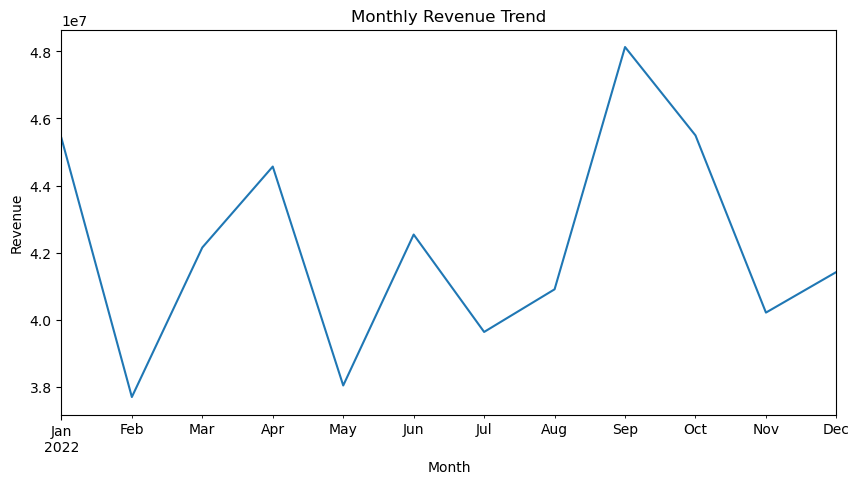

In [4]:
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Revenue'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## 2. Top 10 products by revenue

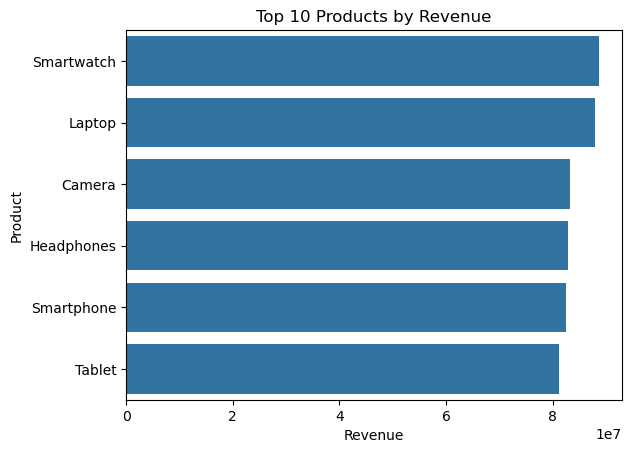

In [5]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


## 3. Regional sales performance

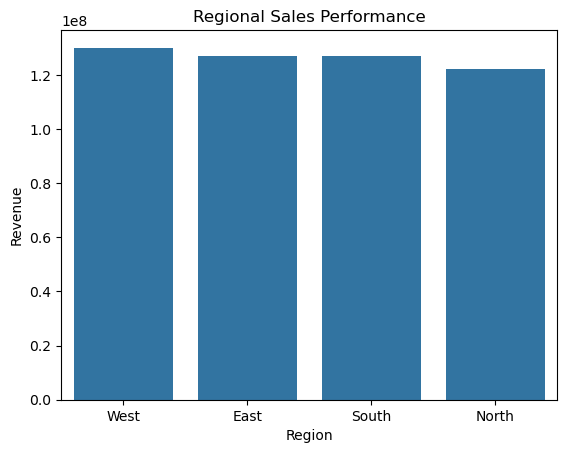

In [6]:
regional_sales = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("Regional Sales Performance")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

## 4. Category performance

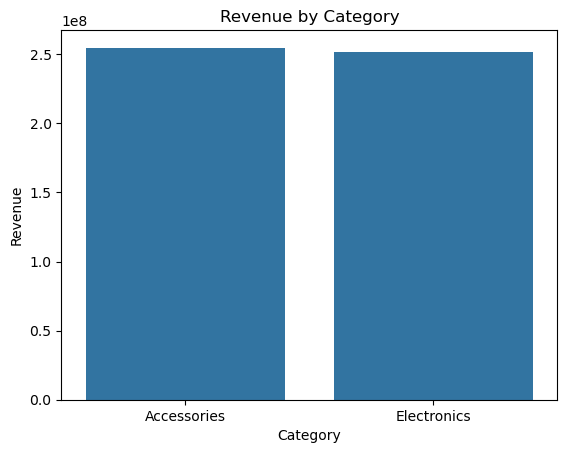

In [7]:
category_sales = df.groupby('Category')['Revenue'].sum()
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

## 5. Customer purchase frequency

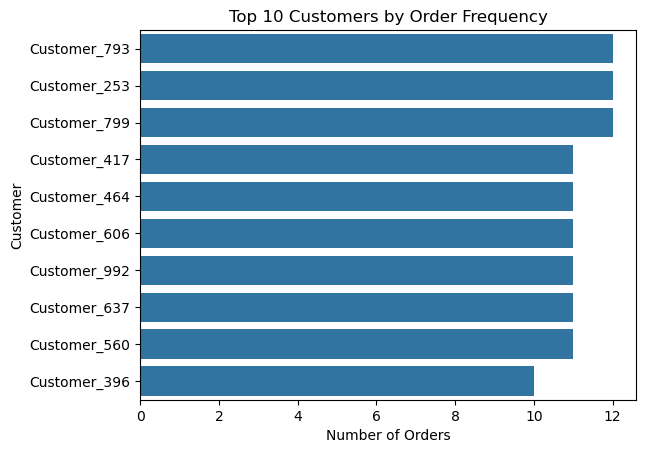

In [8]:
customer_orders = df['CustomerName'].value_counts().head(10)
sns.barplot(x=customer_orders.values, y=customer_orders.index)
plt.title("Top 10 Customers by Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Customer")
plt.show()


## Insights Summary

In [9]:
print("\n--- Insights Summary ---")
print(f"Total Revenue: {df['Revenue'].sum():,.0f}")
print(f"Average Order Value: {df['Revenue'].mean():,.2f}")
print("Top product by revenue:", top_products.index[0])
print("Best performing region:", regional_sales.index[0])



--- Insights Summary ---
Total Revenue: 506,222,233
Average Order Value: 101,244.45
Top product by revenue: Smartwatch
Best performing region: West
